# Paper: Data-based analysis, modelling and forecasting of the COVID-19 outbreak

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

C:\Users\kuotuantuan\AppData\Local\Temp\ipykernel_4980\768876771.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


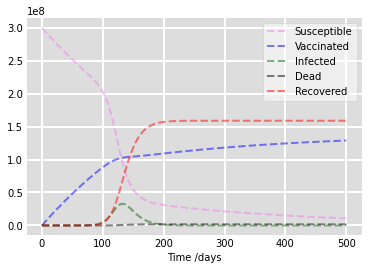

In [2]:
# Initial conditions
N = 3e8

eta = 4e-4

S0 = N -1
V0 = 0
I0 = 1
D0 = 0
R0 = 0
# A grid of time points (in days)
t = np.linspace(0, 500, 100) 

#parameters
alpha = 3.5e-3
beta = 0.3
sigma = 0.05
lbda = 1e-3
rho = 0.1

# The SIR model differential equations.
def deriv(y, t, alpha, beta, sigma, lbda, rho):
    S, V, I, D, R = y
    dSdt = - beta/N * S * I - alpha * S
    dVdt = alpha * S - sigma * beta/N * V * I
    dIdt = beta/N * S * I + sigma * beta/N * V * I - lbda * I - rho * I 
    dDdt = lbda * I
    dRdt = rho * I

    return dSdt, dVdt, dIdt, dDdt, dRdt


# Initial conditions vector
y0 = S0, V0, I0, D0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(alpha, beta, sigma, lbda, rho))
S, V, I, D, R = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')
ax.plot(t, V, 'blue', alpha=0.5, lw=2, label='Vaccinated', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D, 'black', alpha=0.5, lw=2, label='Dead', linestyle='dashed')
ax.plot(t, R, 'red', alpha=0.5, lw=2, label='Recovered', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, S, V, I, D, R]) 

np.savetxt("svidr_sim.csv", a, delimiter=",")